In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("chatbot_eval_df.csv")
df.head()

,questionText,topic,answerText,ChatbotAnswers
0,I’m facing severe depression and anxiety and I...,depression,"First, be patient because anxiety and depressi...",Anxiety usually about some sort of anticipated...
1,There are many people willing to lovingly prov...,depression,"From the little bit you wrote, my guess is you...",As long as you have friends to love and apprec...
2,I've become so jaded that I can't control my t...,depression,Maybe your thoughts require your attention and...,Anxiety usually about some upcoming circumstan...
3,After he got home from the hospital he was ang...,depression,Since as husband and wife your lives are close...,Your question reads as though you are the one ...
4,I have terrible anxiety and depression. I've t...,depression,Is it possible you simply didn't mix well with...,Probably what you need is a new approach to fi...


In [3]:
# Convert the texts into TF-IDF vectors
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([df.loc[25, "answerText"], df.loc[25, "ChatbotAnswers"]])
print(vectors[:3])

  (0, 7)	0.055817481350722446
  (0, 53)	0.03971459770058322
  (0, 95)	0.055817481350722446
  (0, 25)	0.055817481350722446
  (0, 52)	0.055817481350722446
  (0, 66)	0.055817481350722446
  (0, 3)	0.055817481350722446
  (0, 68)	0.055817481350722446
  (0, 74)	0.055817481350722446
  (0, 19)	0.03971459770058322
  (0, 36)	0.055817481350722446
  (0, 43)	0.03971459770058322
  (0, 35)	0.055817481350722446
  (0, 31)	0.055817481350722446
  (0, 105)	0.11163496270144489
  (0, 51)	0.055817481350722446
  (0, 38)	0.055817481350722446
  (0, 99)	0.055817481350722446
  (0, 102)	0.03971459770058322
  (0, 5)	0.11914379310174965
  (0, 44)	0.11163496270144489
  (0, 23)	0.055817481350722446
  (0, 63)	0.03971459770058322
  (0, 109)	0.11163496270144489
  (0, 55)	0.055817481350722446
  :	:
  (1, 102)	0.06542538546977233
  (1, 5)	0.196276156409317
  (1, 63)	0.13085077093954467
  (1, 108)	0.06542538546977233
  (1, 33)	0.06542538546977233
  (1, 70)	0.06542538546977233
  (1, 41)	0.06542538546977233
  (1, 18)	0.0654253

In [4]:
# Calculate the cosine similarity between the vectors
similarity = cosine_similarity(vectors)
print(similarity)
print(similarity[0][1])

[[1.        0.4910868]
 [0.4910868 1.       ]]
0.49108680117080494


In [5]:
df.loc[49, "answerText"], df.loc[49, "ChatbotAnswers"]

('Please feel free to cry during therapy if you suddenly feel painful emotions arising when you describe some of your unsatisfying and unfulfilling relationships and situations.Crying when realizing the emotional hurt and unfairness between you and someone, clears you for new ways of handling interactions.As a therapist, I always have a box of tissues on the table next to the couch where people who utilize my therapy, sit.I hope you will soon discover that once your tears unlock your awareness of harmful relationships in your life, you will quickly see the freedom to establish new and happier patterns of relating.Have a good therapy!',
 'How do you imagine crying in therapy would be embarrassing?Therapists are very familiar with people feeling like a fool, while in the midst of new awareness and seeing how this awareness is freeing, raise the unwelcome fact of crying, if this happens in discussing your new awareness with your therapist.Therapists have empathy and care about the situati

In [6]:
sklearn_cosine_sims = []

for i in range(len(df)):
    vectors = vectorizer.fit_transform([df.loc[i, "answerText"], df.loc[i, "ChatbotAnswers"]])
    sklearn_cosine_sims.append(cosine_similarity(vectors)[0][1])

In [7]:
sklearn_cosine_sims[:5]

[0.3087825187269074,
 0.6141219021898782,
 0.3679917581982588,
 0.4998487296710384,
 0.37027833118343645]

In [8]:
df["sklearn_cosine_sims"] = sklearn_cosine_sims
df.head()

,questionText,topic,answerText,ChatbotAnswers,sklearn_cosine_sims
0,I’m facing severe depression and anxiety and I...,depression,"First, be patient because anxiety and depressi...",Anxiety usually about some sort of anticipated...,0.308783
1,There are many people willing to lovingly prov...,depression,"From the little bit you wrote, my guess is you...",As long as you have friends to love and apprec...,0.614122
2,I've become so jaded that I can't control my t...,depression,Maybe your thoughts require your attention and...,Anxiety usually about some upcoming circumstan...,0.367992
3,After he got home from the hospital he was ang...,depression,Since as husband and wife your lives are close...,Your question reads as though you are the one ...,0.499849
4,I have terrible anxiety and depression. I've t...,depression,Is it possible you simply didn't mix well with...,Probably what you need is a new approach to fi...,0.370278


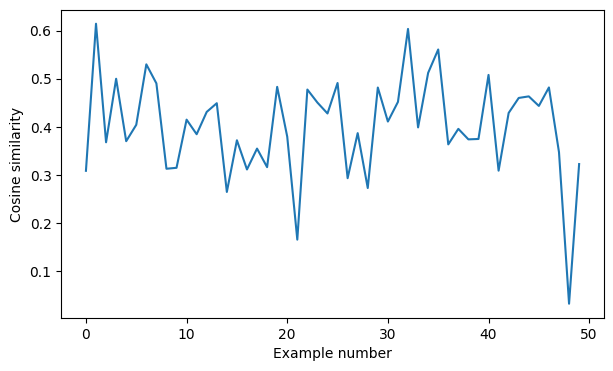

In [9]:
plt.figure(figsize=(7, 4))
plt.xlabel("Example number")
plt.ylabel("Cosine similarity")
plt.plot(df["sklearn_cosine_sims"])

In [10]:
print("Mean Similarity =", np.mean(df["sklearn_cosine_sims"]))
print("Median Similarity =", np.median(df["sklearn_cosine_sims"]))

Mean Similarity = 0.40135139724676683
Median Similarity = 0.40158974667426484


In [12]:
df.to_csv("chatbot_eval_scores.csv", index=False)